**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(UpSetR)
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
TXT_FOLDER_REGION = "fcc_table"

## Import data

In [3]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

fcc_table.concat.starr.mpra.crispri.e2g.atac.tss.bed.gz 
fcc_table.final.starr.mpra.crispri.e2g.atac.tss.bed.gz 
fcc_table.final.starr.mpra.crispri.e2g.atac.tss.tsv 
fcc_table.merge.starr.mpra.crispri.e2g.atac.tss.bed.gz 
fcc_table.result.starr.mpra.crispri.e2g.atac.tss.bed.gz 
fcc_table.share.starr.mpra.crispri.e2g.atac.tss.tsv 
K562.hg38.atac.bed.gz 
K562.hg38.encode_e2g_benchmark.bed.gz 
K562.hg38.fcc_astarr_csaw.bed.gz 
K562.hg38.fcc_crispri_growth.bed.gz 
K562.hg38.fcc_crispri_hcrff.bed.gz 
K562.hg38.fcc_starrmpra_junke.bed.gz 
K562.hg38.tss.bed.gz 
summary 


In [4]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "fcc_table.final.starr.mpra.crispri.e2g.atac.tss.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_fcc_union = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 895792     15


Chrom,ChromStart,ChromEnd,Merge_Region,Merge_Group,Merge_Label,Assay,Group,Label,Region,Target,Score,NLog10P,Method,Source
chr1,9976,10475,chr1:9976-10475,"ASTARR,ATAC","ASTARR_R:csaw:KS91,ASTARR_R:junke,ATAC",ATAC-STARR,ASTARR,ASTARR_R:csaw:KS91,chr1:9976-10475,NA,-4.184000,7.358,CSAW,Reddy Lab
chr1,9976,10475,chr1:9976-10475,"ASTARR,ATAC","ASTARR_R:csaw:KS91,ASTARR_R:junke,ATAC",ATAC-STARR,ASTARR,ASTARR_R:junke,chr1:10010-10430,NA,-2.520916,NA,Junke,Reddy Lab
chr1,9976,10475,chr1:9976-10475,"ASTARR,ATAC","ASTARR_R:csaw:KS91,ASTARR_R:junke,ATAC",ATAC,ATAC,ATAC,chr1:10038-10405,NA,3.940038,NA,MACS,Reddy Lab


## Subset

In [5]:
dat  = dat_region_fcc_union
dat  = dat %>% dplyr::filter(str_detect(Group, "ATAC|STARR|MPRA|CRISPR"))
dat1 = dat

dat  = dat_region_fcc_union
dat  = dat %>% dplyr::filter(Label == "E2G:Regulated:TRUE")
dat2 = dat

dat = bind_rows(dat1, dat2)
dat = dat %>%
    dplyr::select(Merge_Region, Group) %>%
    dplyr::distinct()

### assign and show
dat_region_subset = dat
print(dim(dat))
print(table(dat$Group))
fun_display_table(head(dat,3))

[1] 637620      2

        ASTARR           ATAC CRISPRi-Growth  CRISPRi-HCRFF  E2G-Benchmark 
        320896         149603           6183             74            387 
         LMPRA          TMPRA         WSTARR 
         25091           5691         129695 


Merge_Region,Group
chr1:9976-10475,ASTARR
chr1:9976-10475,ATAC
chr1:14226-14675,ASTARR


## Upset plot: Total

In [6]:
dat = dat_region_subset
dat = dat %>% 
    dplyr::group_by(Merge_Region) %>% 
    dplyr::mutate(Count = n()) %>%
    dplyr::ungroup()

dat_region_arrange = dat
fun_display_table(head(dat,3))

Merge_Region,Group,Count
chr1:9976-10475,ASTARR,2
chr1:9976-10475,ATAC,2
chr1:14226-14675,ASTARR,2


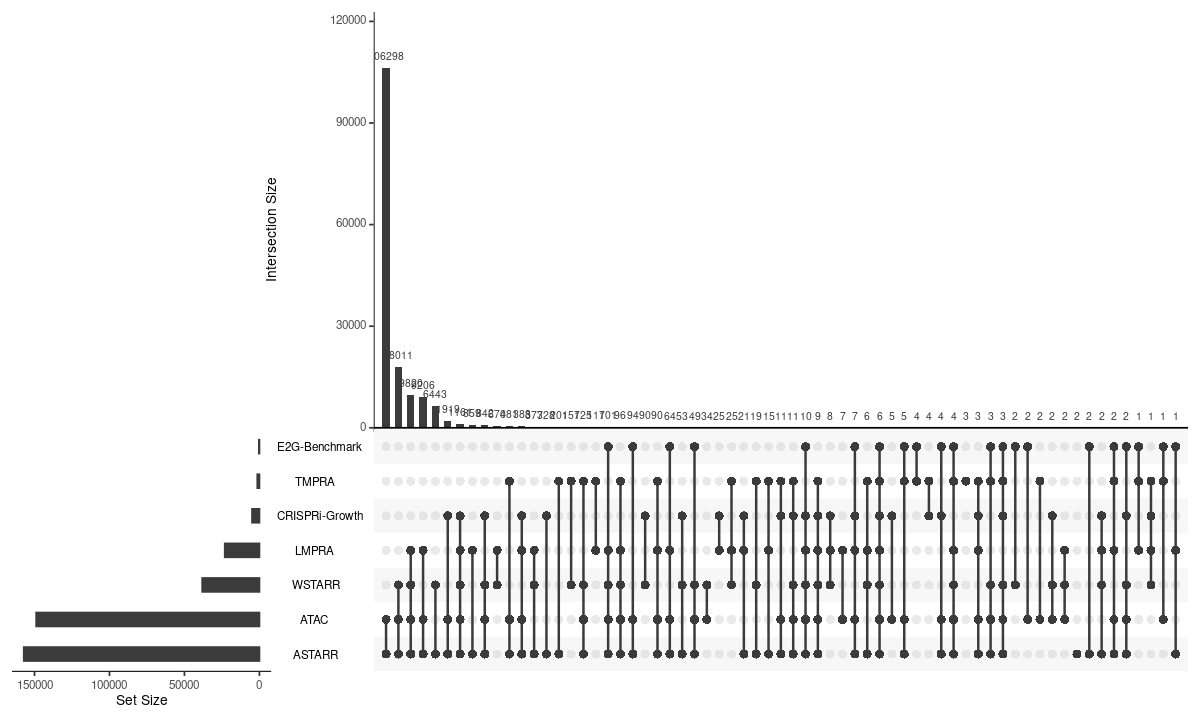

In [7]:
dat = dat_region_arrange
dat = dat %>% dplyr::filter(Count > 1)
lst = split(dat$Merge_Region, dat$Group)

options(repr.plot.width=10, repr.plot.height=6)
upset(
    fromList(lst), 
    nintersects = NA, 
    order.by = "freq", 
    nsets = 7,
    mb.ratio = c(0.6, 0.4)
)

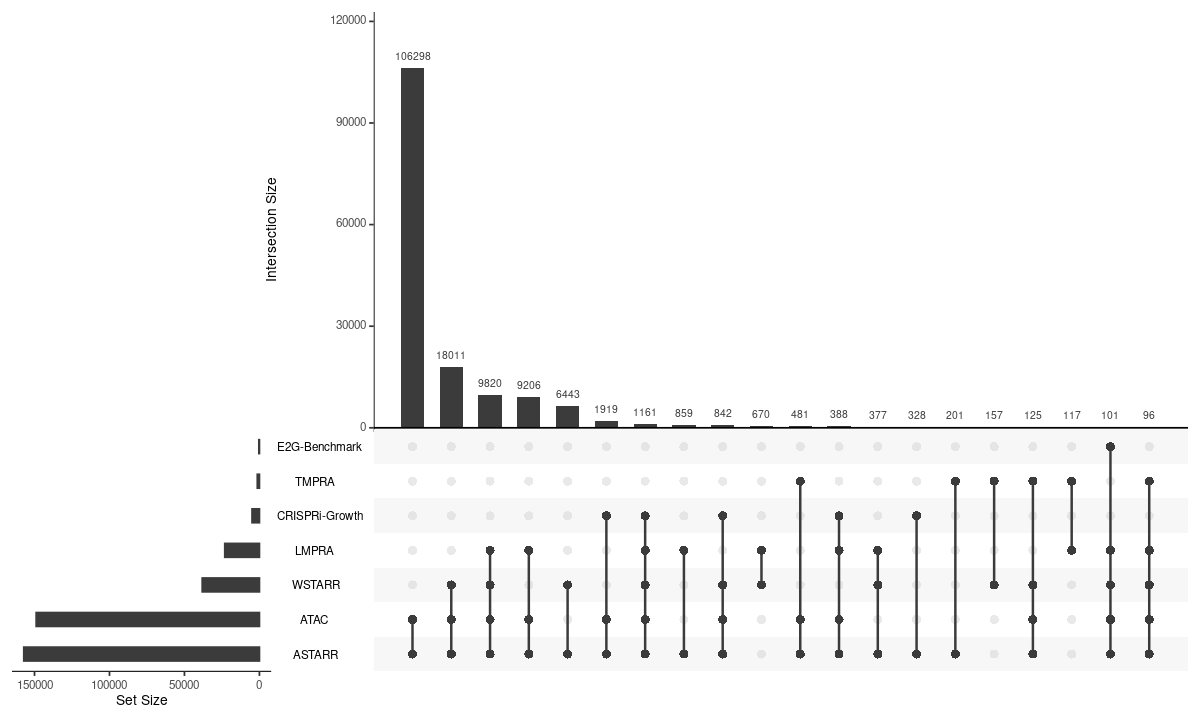

In [8]:
dat = dat_region_arrange
dat = dat %>% dplyr::filter(Count > 1)
lst = split(dat$Merge_Region, dat$Group)

options(repr.plot.width=10, repr.plot.height=6)
upset(
    fromList(lst), 
    nintersects = 20, 
    order.by = "freq", 
    nsets = 7,
    mb.ratio = c(0.6, 0.4)
)

## Upset plot: Summary

In [9]:
fun_str_map = function(vec){
    dat = tribble(
        ~Assay,              ~Label,
        "ATAC",              "ATAC",
        "ASTARR",            "STARR",
        "WSTARR",            "STARR",
        "TMPRA",             "MPRA",
        "LMPRA",             "MPRA",
        "CRISPRi-HCRFF",     "CRISPR",
        "CRISPRi-Growth",    "CRISPR",
        "E2G-Benchmark",     "CRISPR"
    )
    
    res = fun_str_map_match(
        vec_txt_input   = vec,
        vec_txt_pattern = dat$Assay,
        vec_txt_replace = dat$Label
    )
    return(res)
}

In [12]:
dat = dat_region_subset
dat = dat %>%
    dplyr::mutate(Group = fun_str_map(Group)) %>%
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Merge_Region) %>% 
    dplyr::mutate(Count = n()) %>%
    dplyr::ungroup()

### assign and show
dat_region_arrange = dat
print(dim(dat))
print(table(dat$Group))
fun_display_table(head(dat,3))

[1] 600036      3

  ATAC CRISPR   MPRA  STARR 
149603   6588  30407 413438 


Merge_Region,Group,Count
chr1:9976-10475,STARR,2
chr1:9976-10475,ATAC,2
chr1:14226-14675,STARR,2


**Plot**

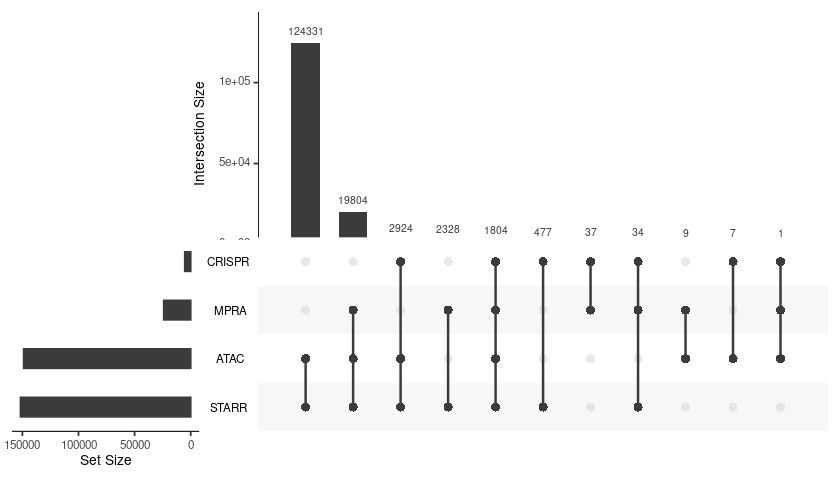

In [13]:
dat = dat_region_arrange

dat = dat %>% dplyr::filter(Count > 1)
lst = split(dat$Merge_Region, dat$Group)

options(repr.plot.width=7, repr.plot.height=4)
upset(
    fromList(lst), 
    nintersects = NA, 
    order.by = "freq", 
    nsets = 7,
    mb.ratio = c(0.5, 0.5)
)

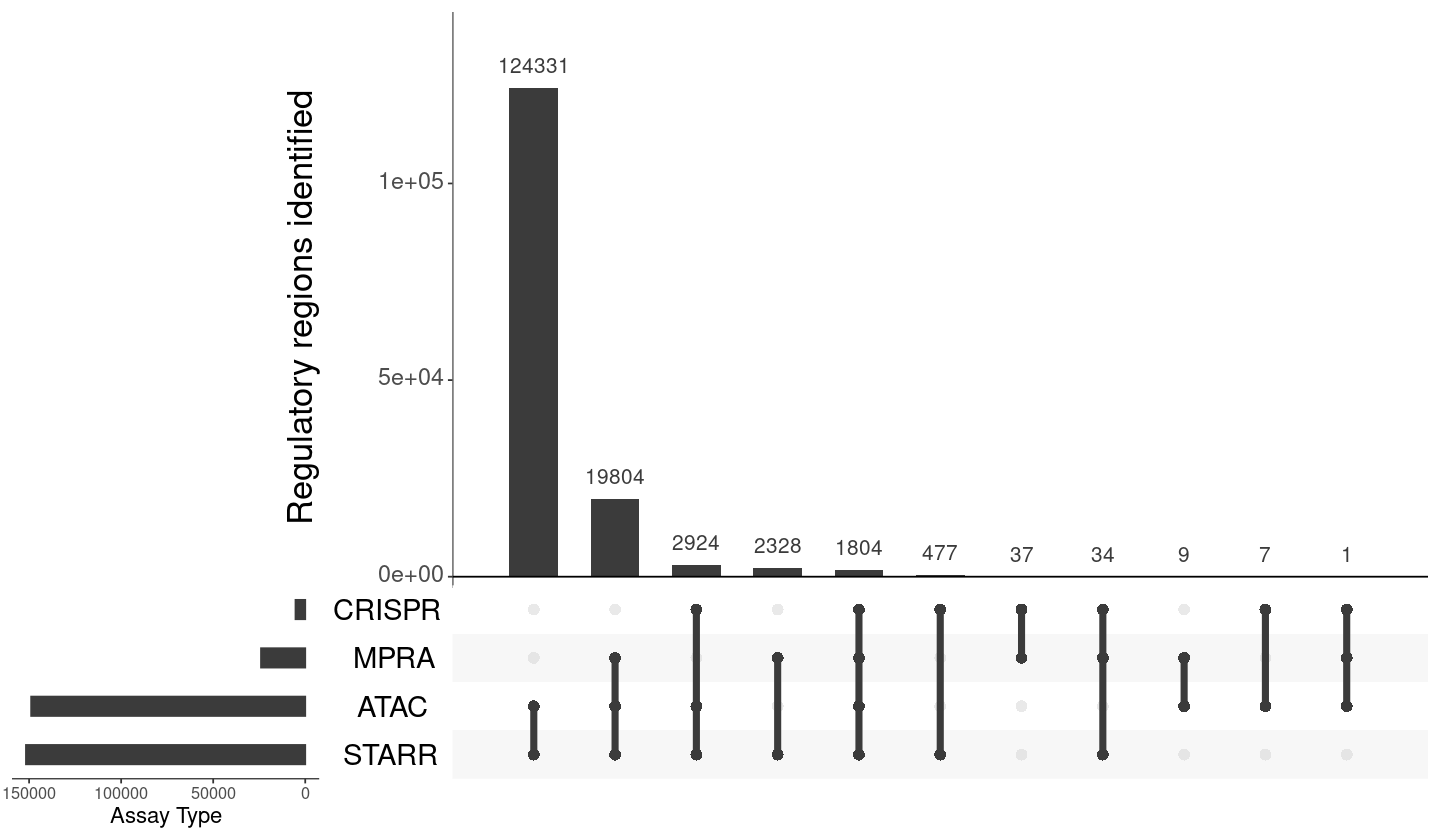

In [14]:
dat = dat_region_arrange

dat = dat %>% dplyr::filter(Count > 1)
lst = split(dat$Merge_Region, dat$Group)

plt = upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 0,
      point.size = 3, 
      line.size  = 2,
      mb.ratio = c(0.7, 0.3),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          2.5, # upper barplot y axis title
          2, # upper barplot y axis text
          1.6, # left  barplot y axis title
          1.4, # left  barplot y axis text
          2.5, # set title
          2  # upper barplot count number
      )
)

options(repr.plot.height=7, repr.plot.width=12)
print(plt)